<h1 align=center><font size = 5>Visualizing Immigration Trends to Canada with Area Plots, Histograms, and Bar Charts</font></h1>

## Objectives
  * Create an area plot (using script layer) of the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013.
  * Create a stacked area plot (using artist layer) of the top 5 countries that contributed the most immigrants to Canada from 1980 to 2013.
  * Create a stacked area plot (using script layer) of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013.
  * Create an area plot (using artist layer) of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013.
  * Create a histogram of the frequency distribution of the number of new immigrants from the various countries to Canada in 2013.
  * Create a histogram of the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013.
  * Create a histogram of immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013.
  * Create a barchart Comparing the number of Icelandic immigrants to Canada from year 1980 to 2013.
  * Create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">About the Data</a></li>
        <li><a href="#ref2">Downloading and Prepping Data</a></li>
        <li><a href="#ref3">Area Plots</a></li>
        <li><a href="#ref4">Histograms</a></li>
        <li><a href="#ref5">Bar Charts</a></li>
    </ol>
</div>

<a id="ref1"></a> 
# About the Data

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml) from United Nation's website.

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals.

<a id="ref2"></a> 
# Downloading and Prepping Data

In [1]:
import numpy as np
import pandas as pd 

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print(df_can.shape)

(195, 43)


#### Cleaning up the dataset to remove columns that are not informative  for visualization 

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


#### Renaming some columns so that they make sense.

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


#### For consistency, ensuring that all column labels of type string.

In [7]:
all(isinstance(column, str) for column in df_can.columns)

False

The above line of code returned *False* when it was tested if all the column labels are of type **string**. They will be converted to type string.

In [8]:
df_can.columns = list(map(str, df_can.columns))

all(isinstance(column, str) for column in df_can.columns)

True

#### Setting the country name as index - useful for quickly looking up countries using .loc method.

In [9]:
df_can.set_index('Country', inplace=True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


#### Adding a 'total' column

In [10]:
df_can['Total'] = df_can.sum(axis=1)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Now the dataframe has an extra column that presents the total number of immigrants from each country in the dataset from 1980 - 2013. 

In [11]:
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [12]:
%%capture
#Creating a list of years from 1980 - 2013 for plotting purposes
years = list(map(str, range(1980, 2014)))

years

<a id="ref3"></a> 
# Area Plots

#### Creating an area plot of the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013 (using script layer)

In [14]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print ('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.2.2


In [15]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Note: Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass `stacked=False`. 

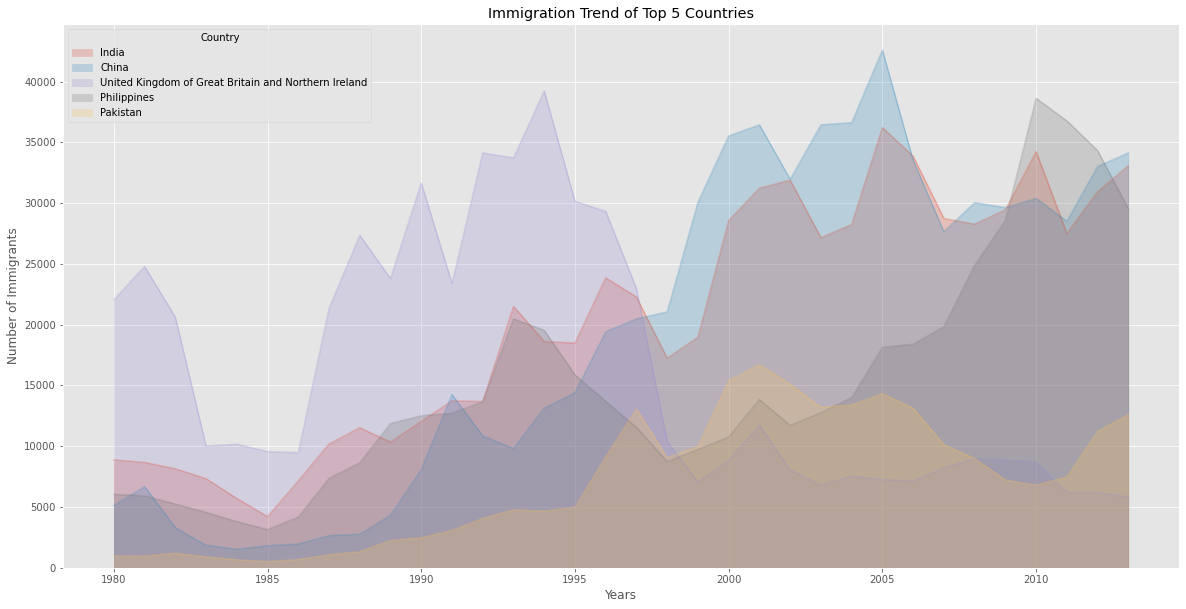

In [16]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

#### Creating a stacked area plot of the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013 (using the artist layer)

Text(0.5, 0, 'Years')

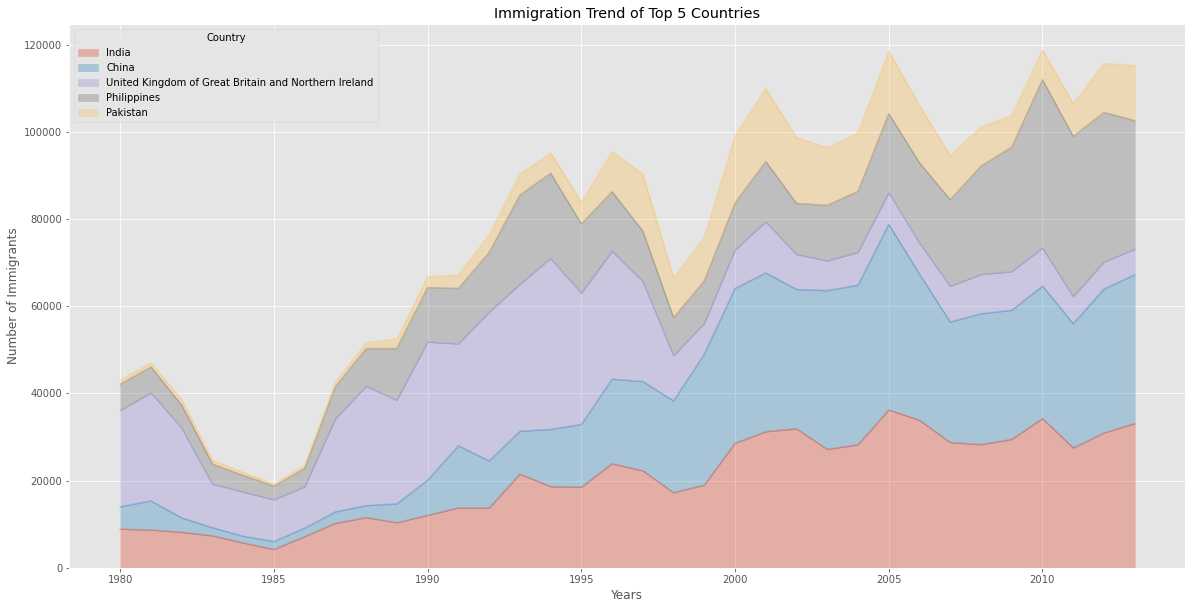

In [17]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

#### Creating a stacked area plot of the 5 countries that contributed the **least** to immigration to Canada from 1980 to 2013 (using script layer)

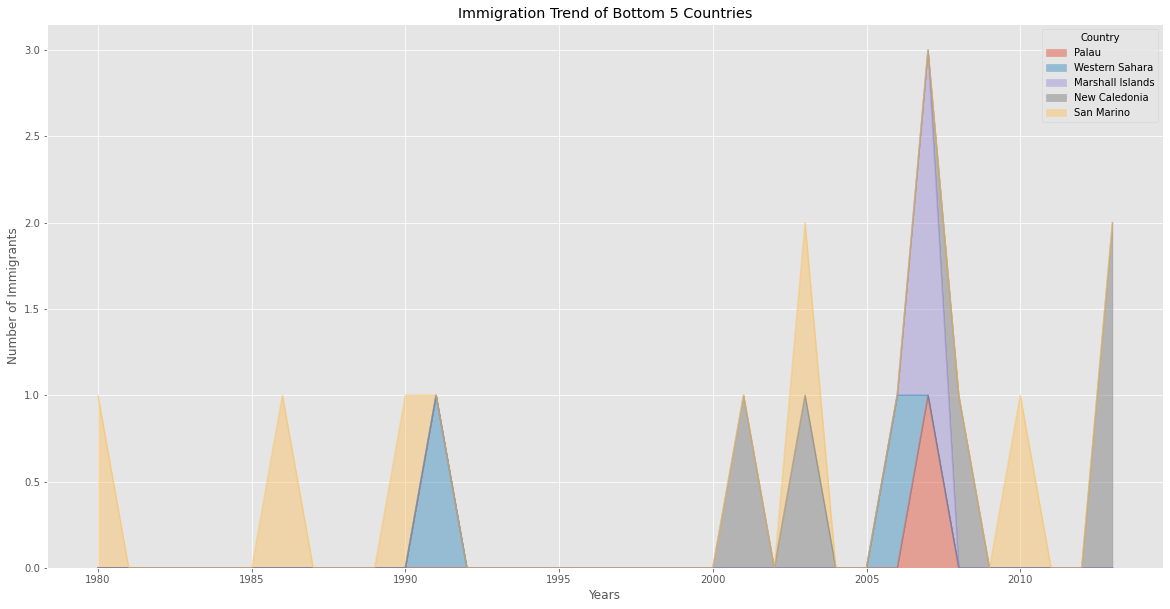

In [18]:
df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)

# getting the bottom 5 entries
df_bottom5 = df_can.head()

# transposing the dataframe
df_bottom5 = df_bottom5[years].transpose() 

df_bottom5.index = df_bottom5.index.map(int) # changing the index values of df_bottom5 to type integer for plotting
df_bottom5.plot(kind='area',
             alpha = 0.45,
             stacked=True,
             figsize=(20, 10), # passing a tuple (x, y) size
             )

plt.title('Immigration Trend of Bottom 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


#### Creating an  area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013 (using artist layer)

Text(0.5, 0, 'Years')

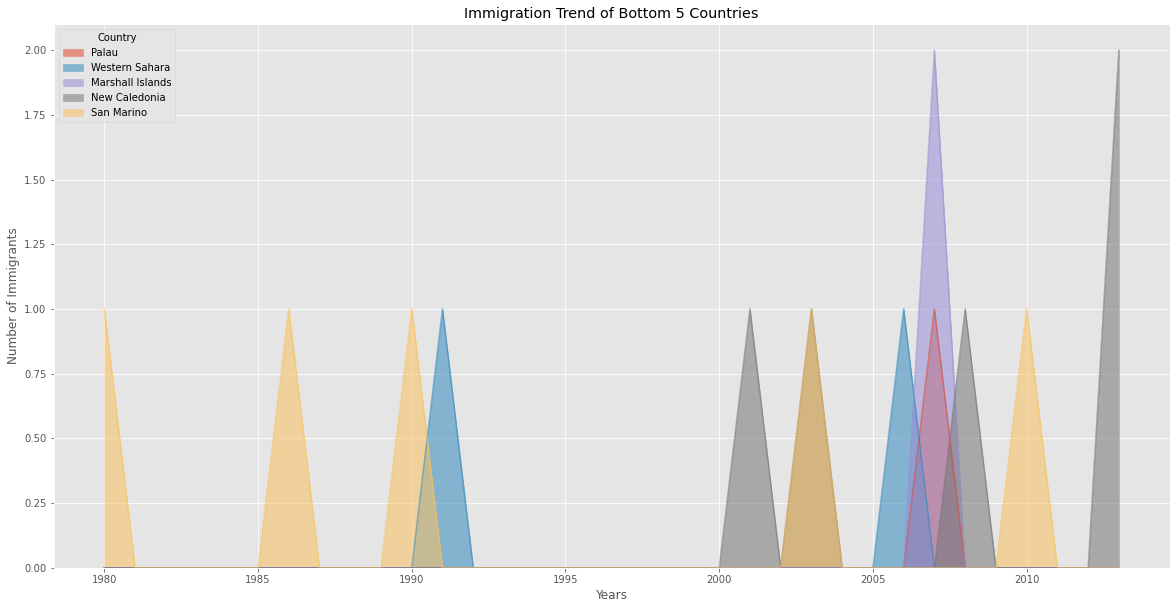

In [19]:
ax2 = df_bottom5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))

ax2.set_title('Immigration Trend of Bottom 5 Countries')
ax2.set_ylabel('Number of Immigrants')
ax2.set_xlabel('Years')

<a id="ref4"></a> 
# Histograms

#### Creating a histogram of the frequency distribution of the number of new immigrants from the various countries to Canada in 2013

In [20]:
df_can['2013'].head()

Country
Palau               0
Western Sahara      0
Marshall Islands    0
New Caledonia       2
San Marino          0
Name: 2013, dtype: int64

In [21]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013:
* 178 countries contributed between 0 to 3412.9 immigrants 
* 11 countries contributed between 3412.9 to 6825.8 immigrants
* 1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

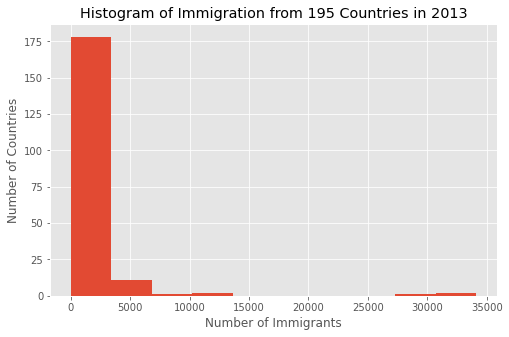

In [22]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants') 

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population. 

The x-axis labels will be adjusted to match with the bin size. 

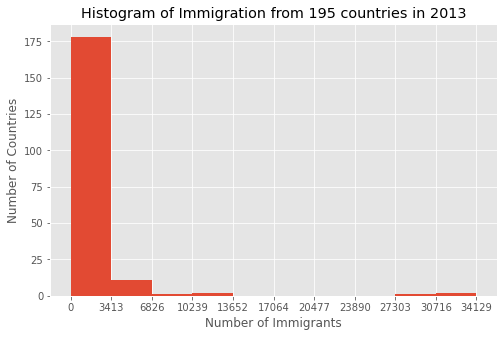

In [23]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') 
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants')

plt.show()

#### Creating a histogram of the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013

In [24]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [25]:
# transposing dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


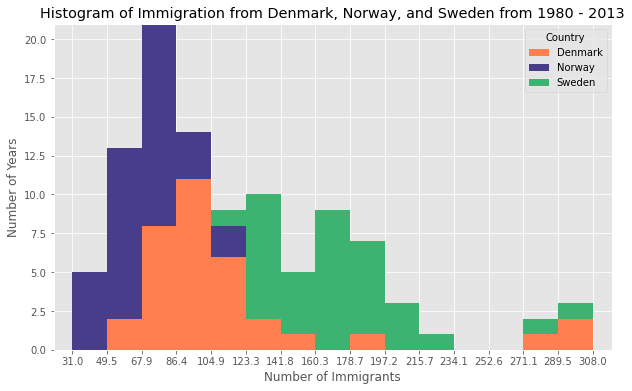

In [29]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

#### Creating a histogram of immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013

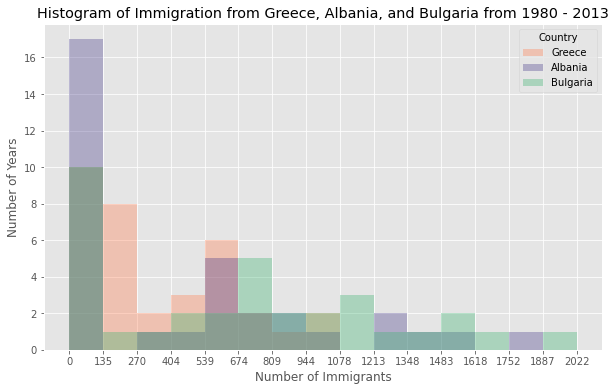

In [28]:
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

# transpose dataframe
df_cof = df_cof.transpose() 

#x-tick values
count, bin_edges = np.histogram(df_cof, 15)

# Un-stacked Histogram
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

<a id="ref5"></a> 
# Bar Charts

#### Comparing the number of Icelandic immigrants to Canada from year 1980 to 2013. 

In [29]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

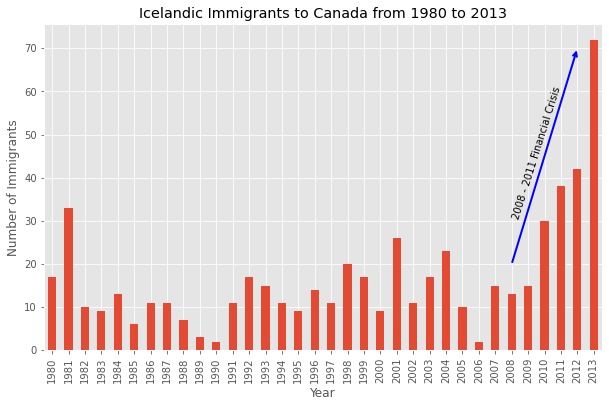

In [32]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. The impact of the financial crisis can be viewed on the graph; the number of immigrants to Canada started increasing rapidly after 2008. 

#### Creating a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. 

In [33]:
# sorting dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)

#top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

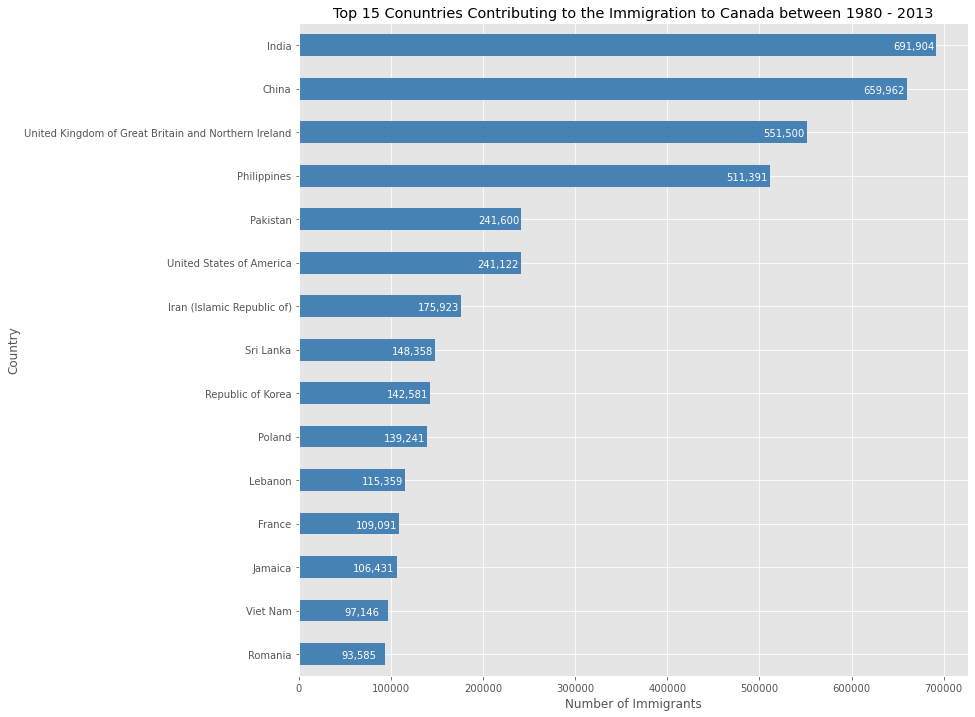

In [36]:
# generating plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotates value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # formatting int with commas
    
    # places text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')



